In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def power_law(_img, gamma, _plot=True):
    n_bytes = _img.itemsize
    c = (2**(n_bytes*8)-1)**(1-gamma)
    transformed_img = np.zeros(shape=_img.shape, dtype=_img.dtype)
    # Perform power law
    transformed_img = (c*(_img)**gamma).astype(_img.dtype)
    return transformed_img

In [3]:
skeleton_img = cv2.imread('salt-and-pepper-Skeleton.png', cv2.IMREAD_GRAYSCALE)

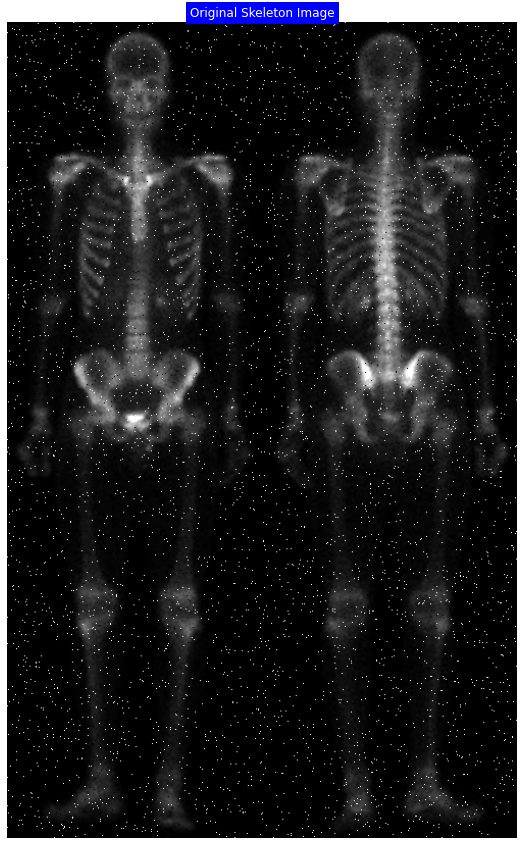

In [4]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Original Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(skeleton_img, cmap = 'gray', vmin=0, vmax=2**(skeleton_img.itemsize*8)-1)

### 1. Eliminate noise

#### The noise can be eliminated by applying median filter

In [5]:
median_filtered_img = cv2.medianBlur(skeleton_img, 3)

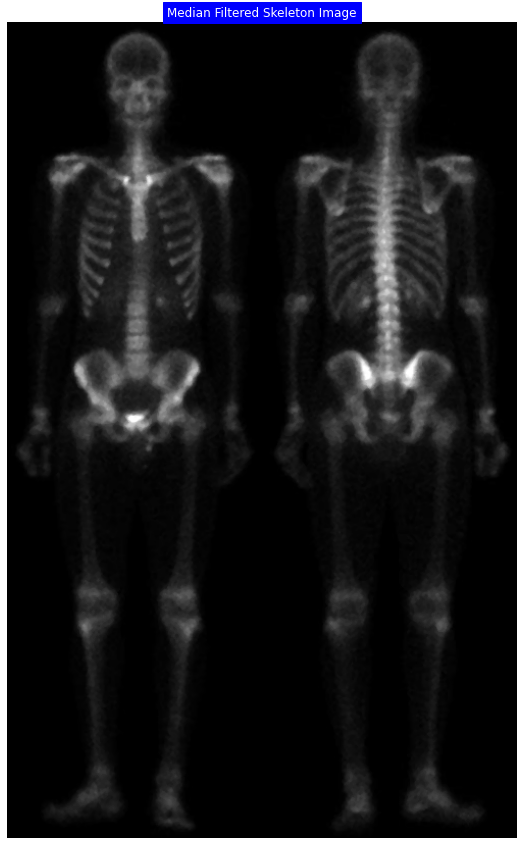

In [6]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(median_filtered_img, cmap = 'gray', vmin=0, vmax=2**(median_filtered_img.itemsize*8)-1)

### 2. 

### Laplacian

In [7]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

In [8]:
# Apply laplacian kernel
laplacian_img = cv2.filter2D(src=median_filtered_img, ddepth=cv2.CV_64F, kernel=kernel)

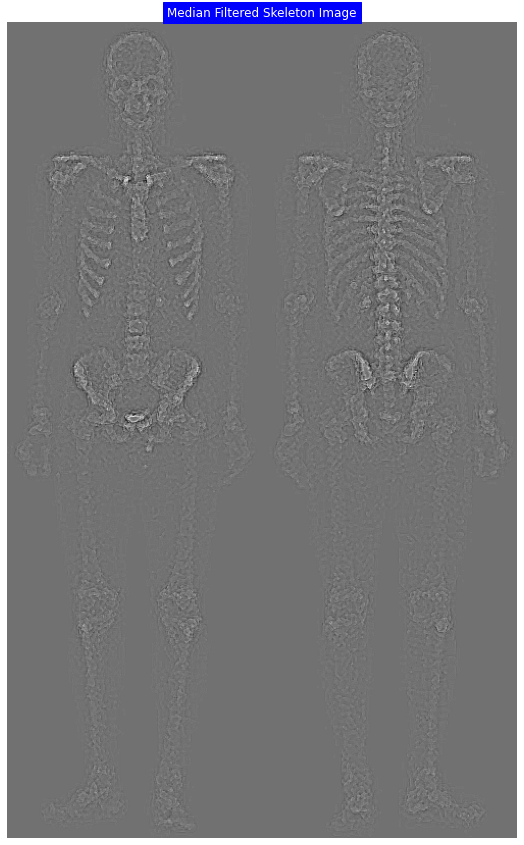

In [9]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(laplacian_img, cmap = 'gray', vmin=laplacian_img.min(), vmax=laplacian_img.max())

### Sharpen

In [10]:
sharpened = median_filtered_img + laplacian_img

In [11]:
sharpened = sharpened - np.min(sharpened)
sharpened = sharpened * (255.0/np.max(sharpened))

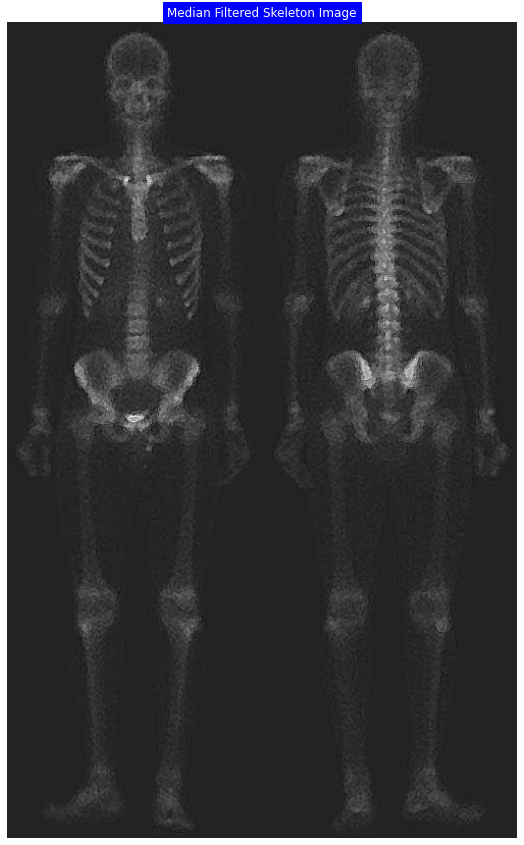

In [12]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sharpened, cmap = 'gray', vmin=sharpened.min(), vmax=sharpened.max())

### 2.

### Sobelx

In [13]:
# sobelx_kernel = np.array([[-1, 0, 1],
#                           [-2, 0, 2],
#                           [-1, 0, 1]])

In [14]:
sobelx_img = cv2.Sobel(median_filtered_img, cv2.CV_64F, 1, 0, ksize=3)
sobelx_img = cv2.convertScaleAbs(sobelx_img)

In [15]:
# treating gradient image as mask image and multiplying it with the sharpened image 
sobelx_img = sobelx_img*sharpened

In [16]:
# final sharpened image by adding the masked image to the original image
sobelx_img = sobelx_img + median_filtered_img

In [17]:
# obtaining Gamma Corrected final image by using power-law transformation
sobelx_img_gamma_corr = power_law(sobelx_img, 0.75)

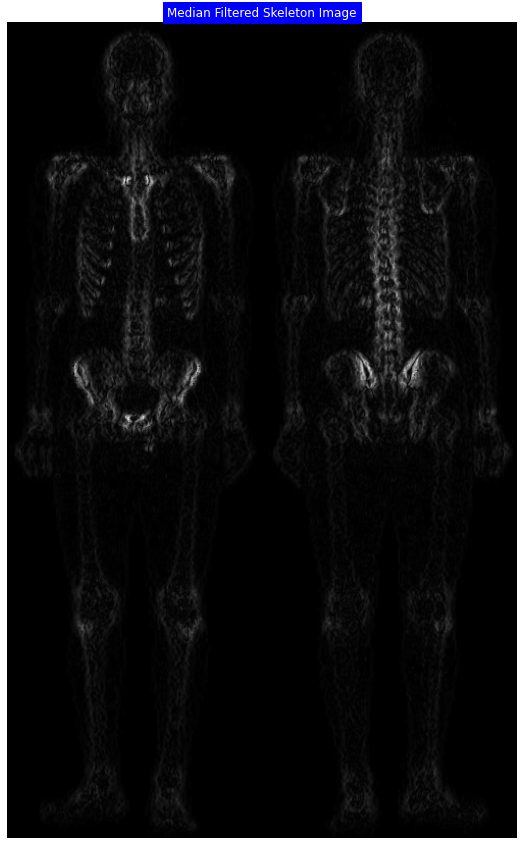

In [18]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sobelx_img_gamma_corr, cmap = 'gray', vmin=sobelx_img_gamma_corr.min(), vmax=sobelx_img_gamma_corr.max())

### 3.

### Sobely

In [19]:
# sobely_kernel = np.array([[-1, -2, -1],
#                           [0 , 0 , 0], 
#                           [1, 2, 1]])

In [20]:
sobely_img = cv2.Sobel(median_filtered_img, cv2.CV_64F, 0, 1, ksize=3)
sobely_img = cv2.convertScaleAbs(sobely_img)

In [21]:
# treating gradient image as mask image and multiplying it with the sharpened image
sobely_img = sobely_img*sharpened

In [22]:
# final sharpened image by adding the masked image to the original image
sobely_img = sobely_img + median_filtered_img

In [23]:
# obtaining Gamma Corrected final image by using power-law transformation
sobely_img_gamma_corr = power_law(sobely_img, 0.75)

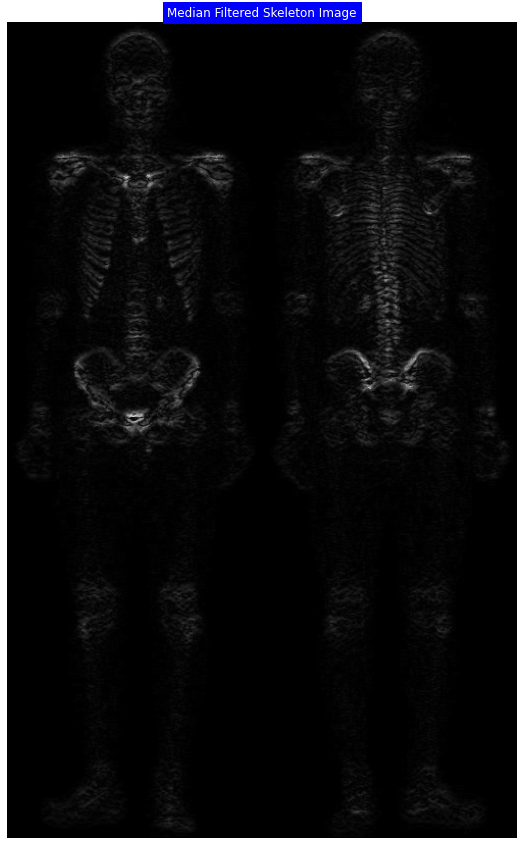

In [24]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(sobely_img_gamma_corr, cmap = 'gray', vmin=sobely_img_gamma_corr.min(), vmax=sobely_img_gamma_corr.max())

### 4. Applying power-law transformation to brighten the image and display muscle parts

In [25]:
# adding both directional gradients
grad = cv2.addWeighted(sobelx_img, 0.5, sobely_img, 0.5, 0)

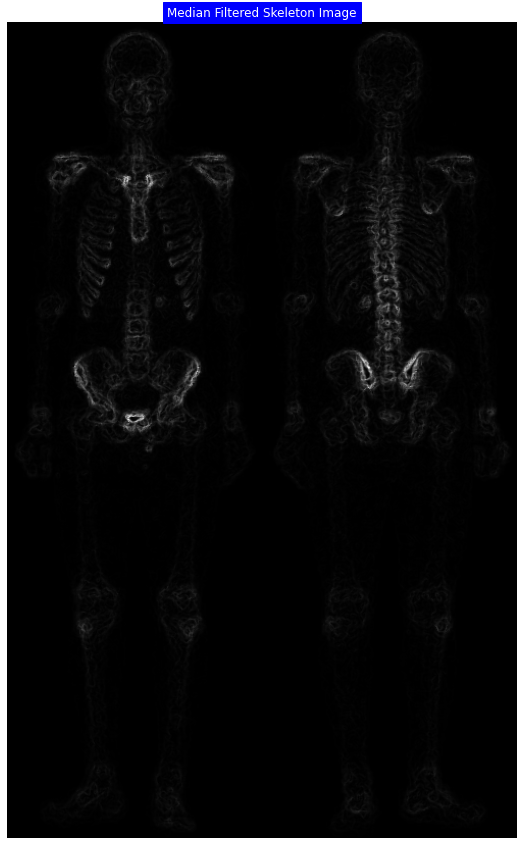

In [26]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(grad, cmap = 'gray', vmin=grad.min(), vmax=grad.max())

In [27]:
# applying power-law
dst = power_law(grad, 0.5)

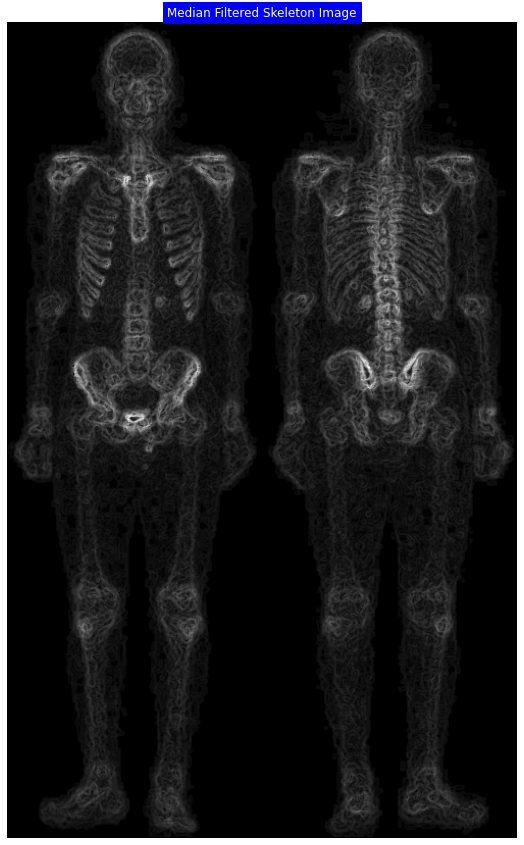

In [28]:
plt.figure(figsize=(20,15))
## disable x & y axis
plt.axis('off')
plt.title('Median Filtered Skeleton Image', color='white', backgroundcolor='blue')
plt.imshow(dst, cmap = 'gray', vmin=dst.min(), vmax=dst.max())